In [1]:
from numpy import genfromtxt
import tensorflow as tf
import tensorflow.keras as keras
'''#from keras.models import Sequential
from keras.layers import Dense, Input, Lambda, Dropout
from keras import regularizers
#from keras.layers import Dropout
from keras.constraints import maxnorm
#from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Model
from keras import regularizers
#from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras import objectives
from keras.models import model_from_json
from keras.layers import Input, Dense, Convolution1D, MaxPooling1D, UpSampling1D, AveragePooling1D, Flatten ,Reshape,ZeroPadding1D,Cropping1D
from keras.models import Model
#from keras.callbacks import TensorBoard
from keras.regularizers import l2, l1
from keras import optimizers
from keras.layers.noise import GaussianNoise
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras.layers import Dense,concatenate, Input,TimeDistributed,LSTM, Lambda, Dropout, Reshape, Conv1D, Flatten, UpSampling1D, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras import backend as K'''

import tensorflow.keras.backend as K

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, LSTM, Lambda
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf


from PIL import Image

import os
import sys
import itertools
#import keras_internal_model
import pandas as pd
import numpy as np
#import train_tools as tt
from numpy import genfromtxt
from time import time

import csv

tf.compat.v1.enable_v2_behavior()


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], 
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])
  except RuntimeError as e:
    print(e)
    
    
print("GPUs: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_logical_devices('GPU')

import cv2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

GPUs:  1


In [2]:
def load_images(parent_path,imgs_paths):
    imgs = []
    for i in imgs_paths:
        imgs.append( cv2.imread( os.path.join(parent_path,i)) )
    return np.array(imgs)

In [3]:
#img_path = '/vol/fob-vol6/mi13/pivillaa/uni/romi/rl_sony/best_next_move_3d_reconstruction/data/imgs'
#idx_file = '/vol/fob-vol6/mi13/pivillaa/uni/romi/rl_sony/best_next_move_3d_reconstruction/data/samples_idx.csv'
#dest_path = '/vol/fob-vol6/mi13/pivillaa/uni/romi/rl_sony/best_next_move_3d_reconstruction/data/class_imgs'

img_path = '/home/pico/uni/romi/rl_sony/best_next_move_3d_reconstruction/data/imgs'
idx_file = '/home/pico/uni/romi/rl_sony/best_next_move_3d_reconstruction/data/validation_samples_2d_idx.csv'
dest_path = '/home/pico/uni/romi/rl_sony/best_next_move_3d_reconstruction/data/validation_class_imgs_2d'
if not os.path.exists(dest_path):
    os.makedirs(dest_path)

df = pd.read_csv(idx_file,usecols=(0,5,6))

In [4]:
imgs = load_images(img_path,df['img'])

In [5]:
print(imgs.shape)
df.head()

(10000, 82, 82, 3)


,img,dp2,dt2
0,195_2d/670_290_274.png,-1,-13
1,124_2d/057_416_076.png,0,16
2,124_2d/153_346_712.png,-3,20
3,124_2d/070_265_277.png,-1,20
4,195_2d/481_115_482.png,-2,20


In [6]:
y = df[['dp2','dt2']].values

In [7]:
def n2c(n,stride=41): #number to coordinate
    row = n//stride
    col = n%stride
    row-=4
    col-=20
    return (row,col)

def c2n(c,stride=41): #coordinate to number
    row = c[0] + 4 #shift range [-4,4] to [0,8]
    col = c[1] + 20 #shift range [-20,20] to [0,20]
    return row*stride + col

In [8]:
for iname,i,l in zip(df['img'],imgs,y):
    im_idx = c2n(l)
    label_name = f"{str(im_idx).zfill(3)}_{str(l[0]).zfill(3)}_{str(l[1]).zfill(3)}"
    folder_path = os.path.join(dest_path,label_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    image_name = f"{iname[:6]}_{iname[7:]}" #remove slash
    cv2.imwrite(os.path.join(folder_path,image_name),i)


In [9]:
fclass = []
n = []
for i in sorted(os.listdir(dest_path)):
    fclass.append(int(i[:3]))
    n .append( len( os.listdir(os.path.join(dest_path,i)) )  )

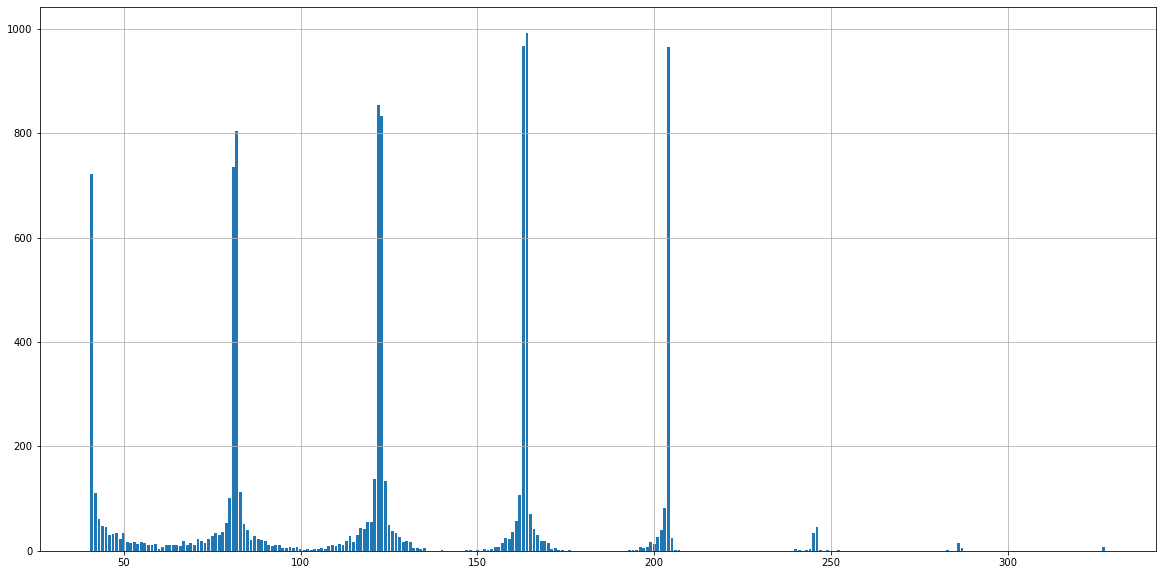

In [10]:
plt.rcParams['figure.figsize'] = [20, 10] 
plt.bar(fclass,n)
plt.grid()

In [11]:
sorted_idx = np.argsort(n)[::-1]
fclass = np.array(fclass)

In [12]:
best = sorted_idx[:10]
print(best)

[111 110 134  81  82  41  40   0  80  83]


In [13]:
fclass[best]

array([164, 163, 204, 122, 123,  82,  81,  41, 121, 124])